In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from cemba_data.tools.integration.utilities import calculate_direct_confusion
from ALLCools.plot import *
from ALLCools.plot.color import plot_colorbar

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

## Tidy data

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

In [5]:
name_map = {'LSX': 'TT*'}

regions = [
    'PFC', 'ACA', 'ORB', 'AI', 'MOs', 'MOp', 'SSp', 'SSs', 'PIR', 'AON'
]


cluster_order = [
    'PT-L5 Abca12',
    'PT-L5 Ptprt',
    'PT-L5 Unc5b',
    'PT-L5 Tenm2',
    'PT-L5 Astn2',
    'PT-L5 Plcb4',
    'PT-L5 Kcnh1',
    'PT-L5 Tmtc2',
    'PT-L5 Nectin1',
]
region_order = [
    'AON', 'PIR', 'TT*', 'PFC', 'ACA', 'ORB', 'AI', 'MOs', 'MOp', 'SSp', 'SSs',
    'Other'
]

sub_region_palette['TT*'] = '#ff7f0e'
sub_region_palette['Other'] = '#000000'

## Dot plot

In [14]:
cell_tidy_data = cell_tidy_data[cell_tidy_data['MajorType'] == 'PT-L5']
cell_tidy_data = cell_tidy_data[cell_tidy_data['SubType'].apply(lambda i: 'Outlier' not in i)].copy()

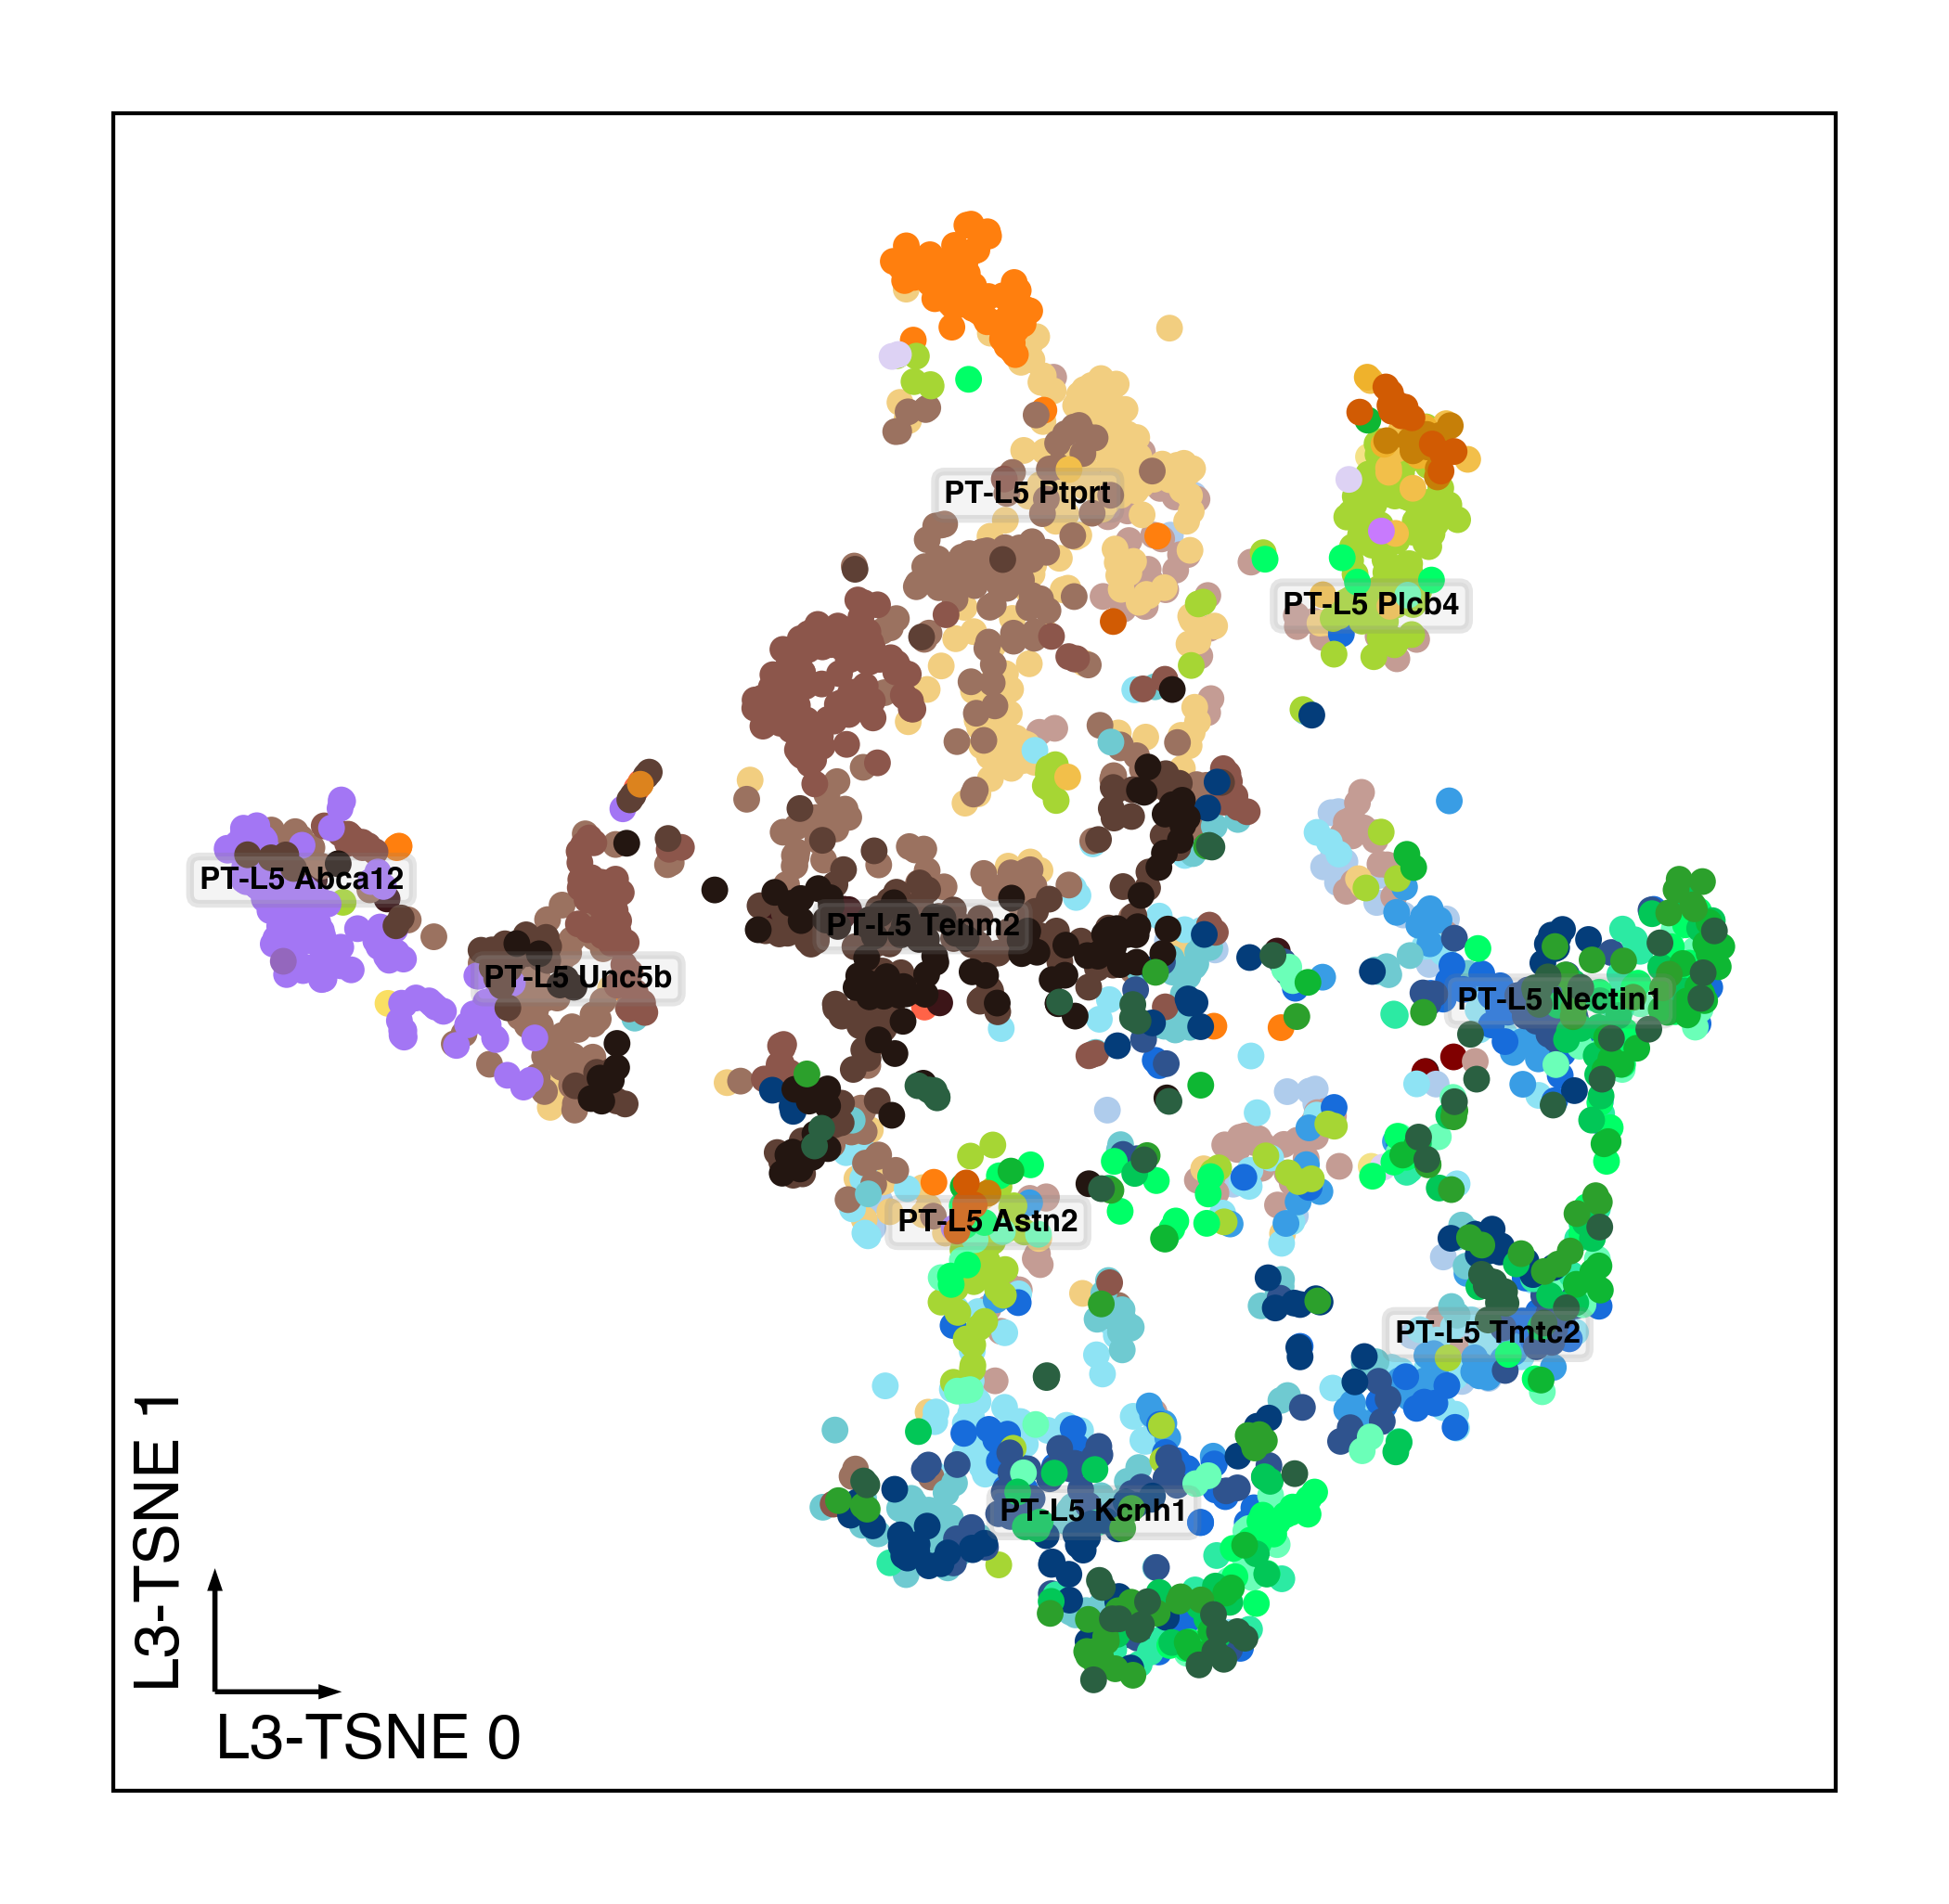

In [17]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-tsne',
                    hue='Region',
                    palette=region_palette,
                    s=3,
                    max_points=None,
                    text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
pass

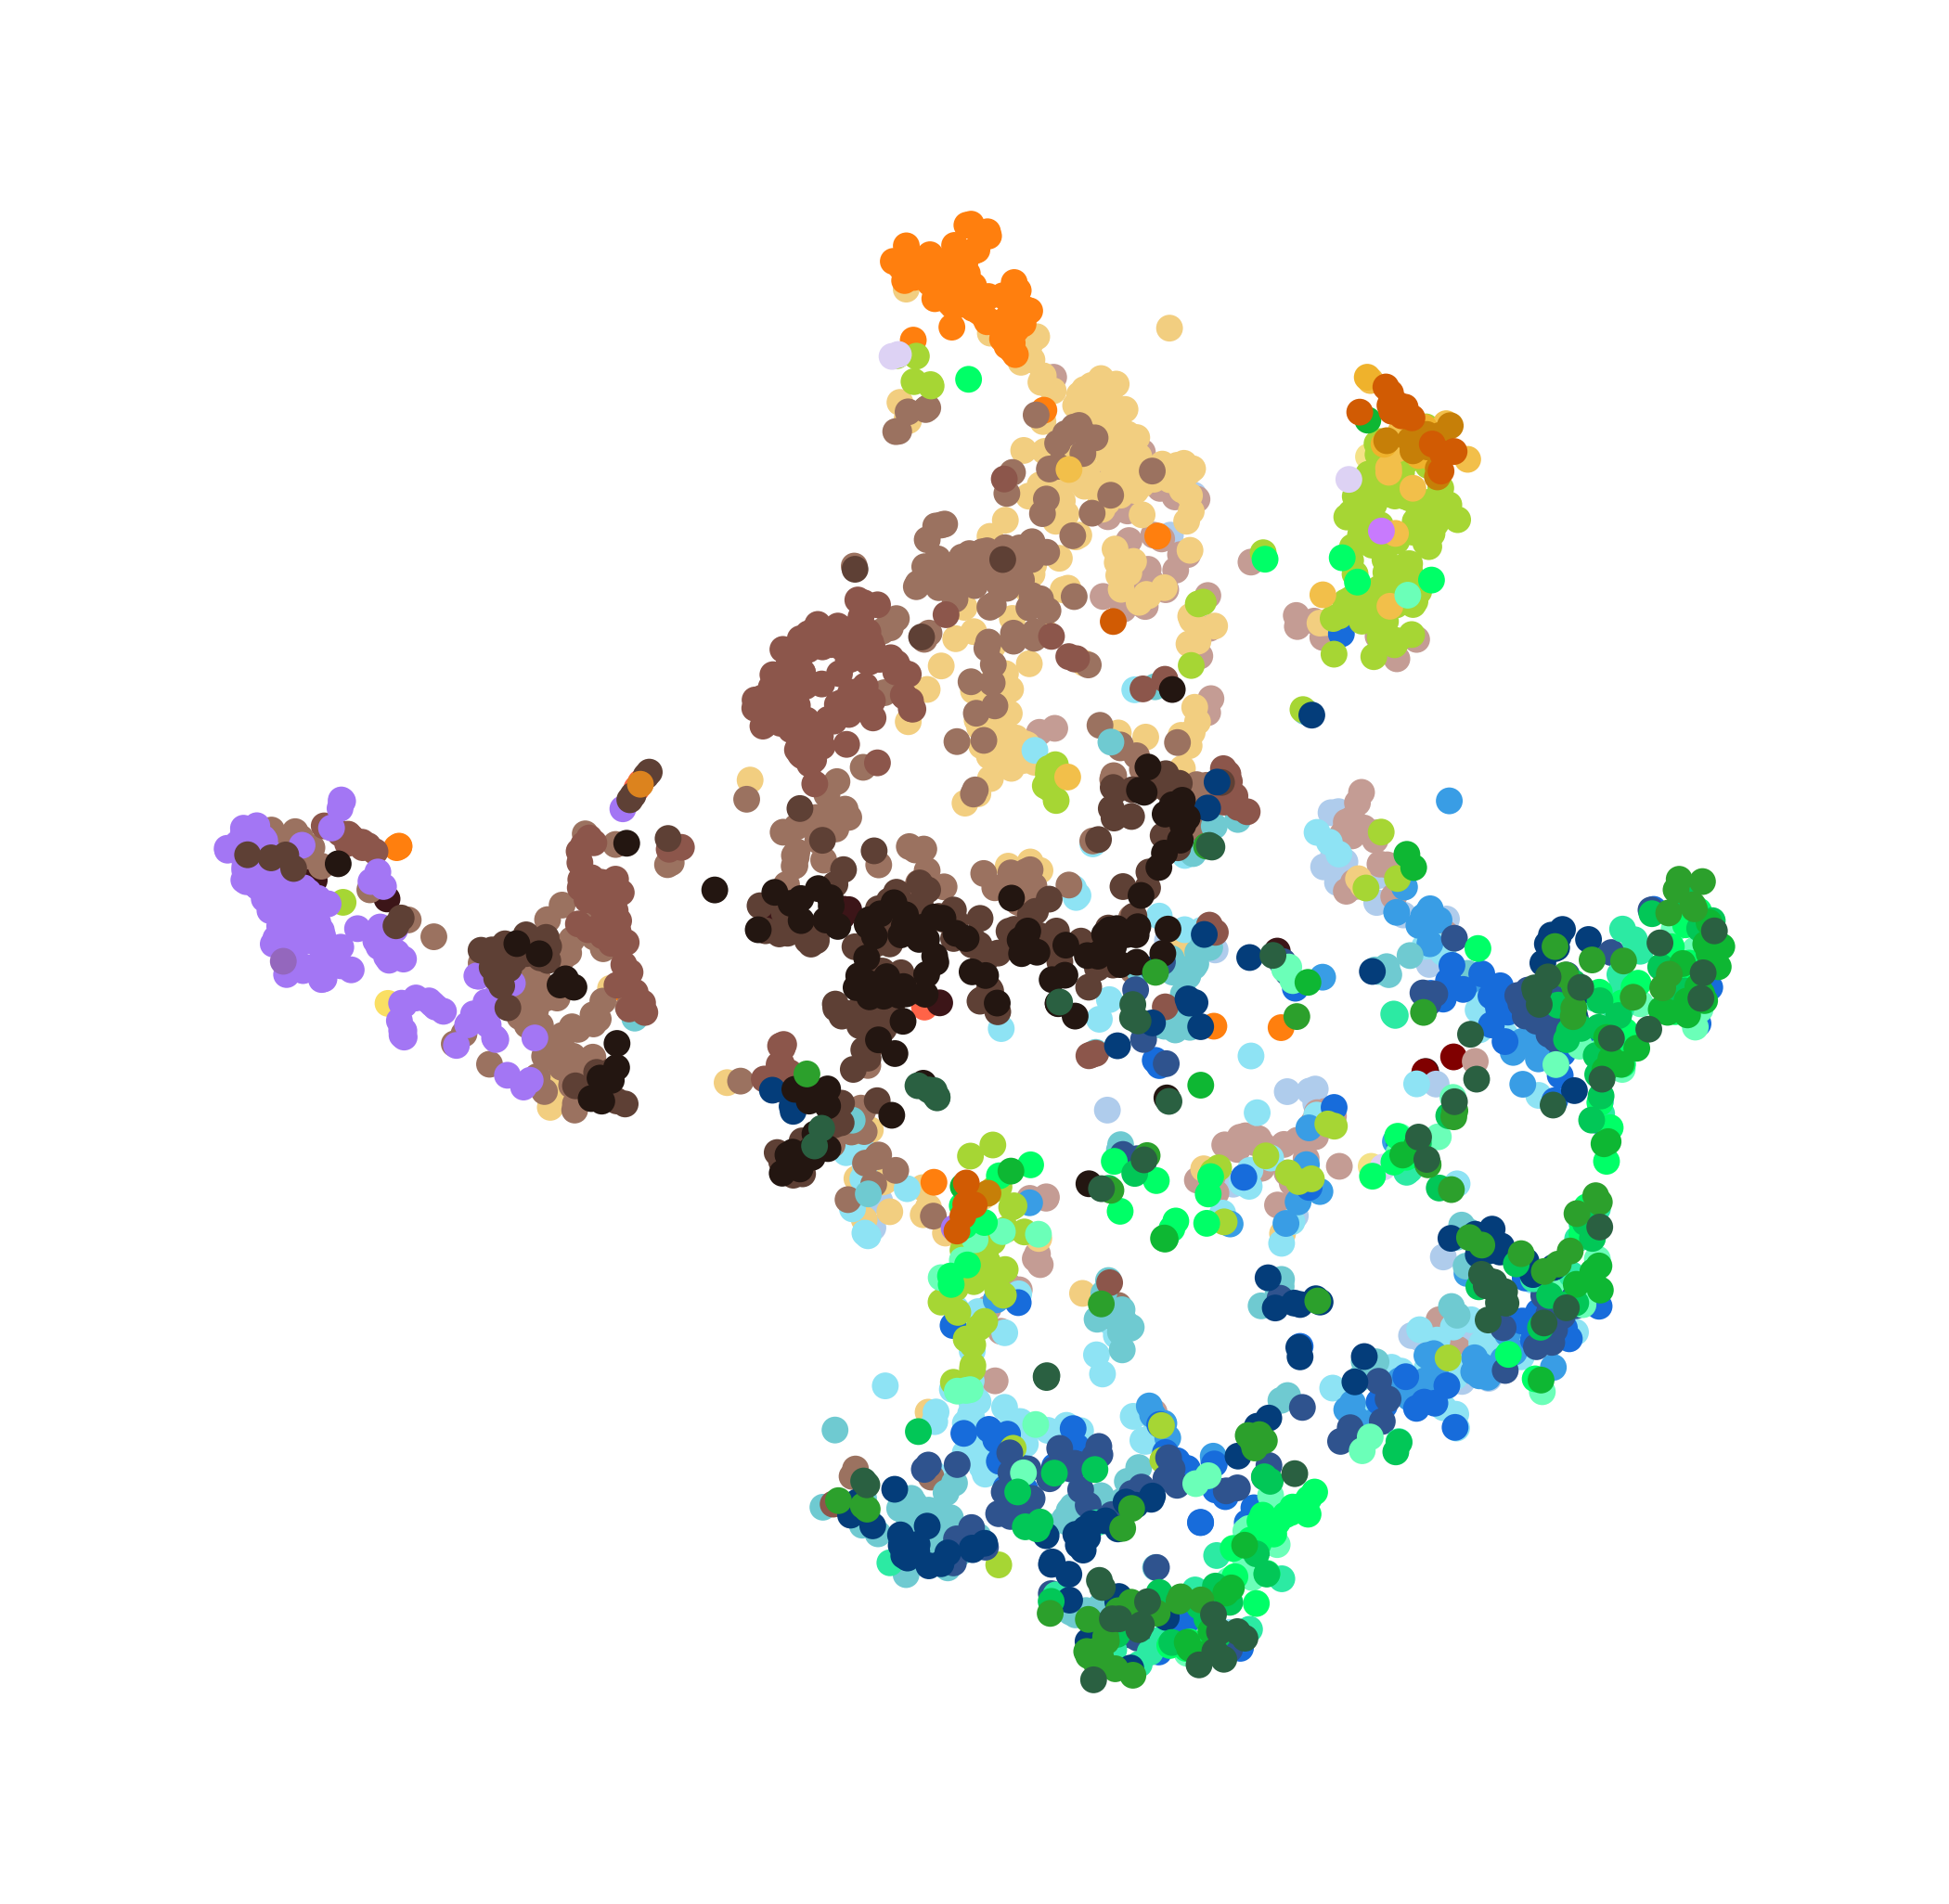

In [20]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-tsne',
                    hue='Region',
                    palette=region_palette,
                    s=3,
                    axis_format=None,
                    max_points=None,
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

#add_ax_box(ax, linewidth=0.5)
fig.savefig('TSNE-PT-L5.color_by_region.scatter_part.png')
pass

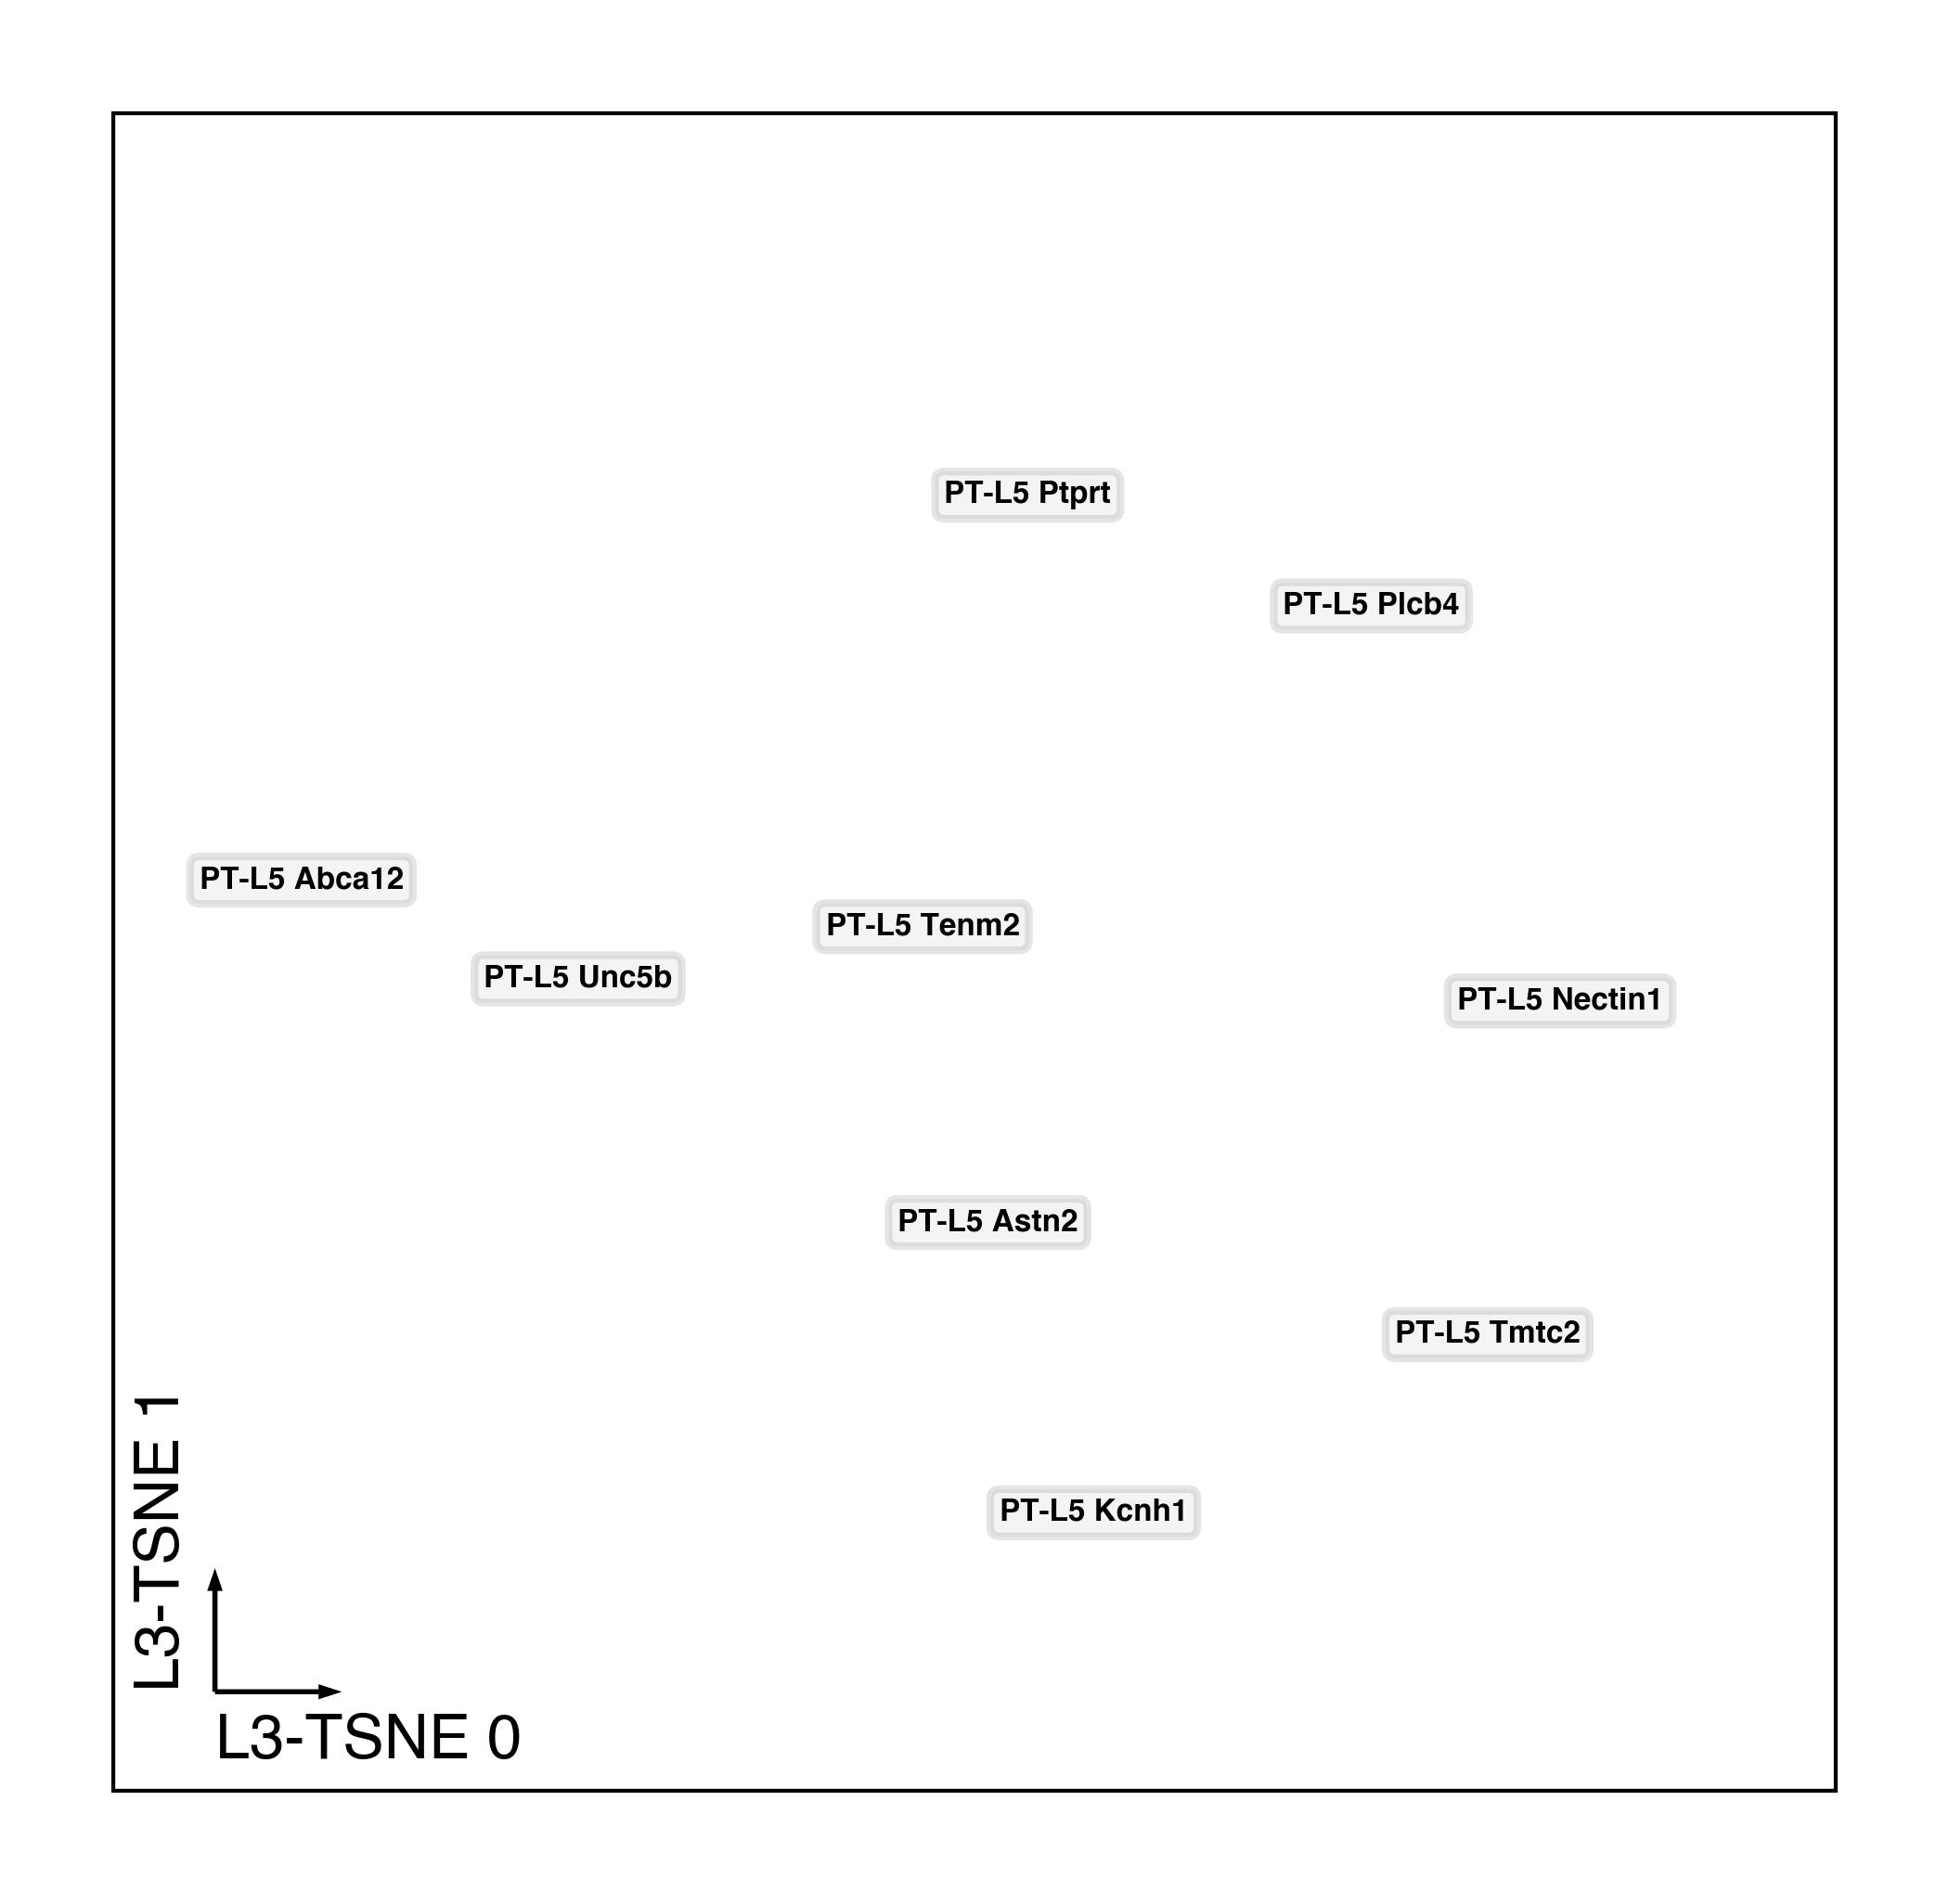

In [22]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-tsne',
                    hue='Region',
                    palette=region_palette,
                    s=3,
                    #axis_format=None,
                    max_points=None,
                    text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig('TSNE-PT-L5.color_by_region.label_part.pdf')
pass